<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [1]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv('survey_data_with_duplicate.csv')

# Display the first few rows
# print(df.head())
# duplicates_all = df[df.duplicated()]
# duplicates_all.head()

Load the data into a pandas dataframe:



In [11]:
duplicates_all = df[df.duplicated(keep=False)]

Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [14]:
# df1 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
# df1 = pd.read_csv('survey_data.csv')
# df1.head()

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.

Example:
Task 1: Identifying Duplicate Rows

    This task asks you to find rows that are entirely identical across all columns.

    You did this correctly and found 40 fully duplicated rows.

    The DataFrame to use: The original DataFrame (df).

    Key function: df.duplicated(keep=False)

In [18]:
## Write your code here
duplicates_all.duplicated().sum()

20

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.



Example:    
Task 2: Finding Duplicates Based on a Subset of Columns

Part 1: Identifying Duplicates on Selected Columns

    Instead of checking for full-row duplicates, here you check for duplicates only in the three columns: MainBranch, Employment, and RemoteWork.


selected_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_on_cols = df[df.duplicated(subset=selected_cols, keep=False)]

Why do you get 65,000 rows?This means a lot of people in your dataset have the same MainBranch, Employment, and RemoteWork values, making them appear as "duplicates" for this subset. This is expected, but it doesn’t mean you did something wrong.


Part 2: Identifying Columns with Identical Values in These Duplicates

 You now need to check which columns have identical values within these duplicated rows.

The logic: Once you have duplicates_on_cols, check how often each column has the same value within groups.

# Identify duplicates based on subset columns
duplicates_subset = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]

# Function to count identical values in each column across duplicate rows
def count_identical_values(group):
    return (group.nunique() == 1).sum()

# Apply the function to each group
identical_values_analysis = duplicates_subset.groupby(['MainBranch', 'Employment', 'RemoteWork']).apply(
    lambda group: pd.Series({
        'Identical_Columns': count_identical_values(group),
        'Total_Columns': len(group.columns),
        'Identical_Percentage': (count_identical_values(group) / len(group.columns)) * 100
    })
).reset_index()

# Preview the results
identical_values_analysis.head()


What does this do?

Groups the duplicates by MainBranch, Employment, and RemoteWork

Checks how many columns are identical within each group

Gives a percentage of identical values per group

DataFrame to use: The one with subset duplicates (duplicates_on_cols).
    

In [21]:
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

duplicates_on_cols = df[df.duplicated(subset=subset_cols, keep=False)]

duplicates_on_cols.duplicated().sum()

20

identical_values_analysis

In [30]:

# Step 0: Define which columns to group by
group_cols = ['MainBranch', 'Employment', 'RemoteWork']

# Step 1: Filter the original DataFrame to only rows that have duplicates on those columns
# (this step is optional, but helps focus the analysis)
duplicates_subset = df[df.duplicated(subset=group_cols, keep=False)]

# Step 2: Define a helper function that counts how many columns have identical values across all rows in a group
def count_identical_values(group):
    # For each column in the group, check how many unique values there are
    # If it's 1, then all rows in the group have the same value → column is identical
    return (group.nunique() == 1).sum()

# Step 3: Group by the selected key columns and apply the analysis
identical_values_analysis = (
    duplicates_subset
    .groupby(group_cols)
    .apply(
        lambda group: pd.Series({
            'Identical_Columns': count_identical_values(group),
            'Total_Columns': group.shape[1],
            'Identical_Percentage': (count_identical_values(group) / group.shape[1]) * 100
        })
    )
    .reset_index()
)

# Step 4: Display the result
identical_values_analysis.head()


C:\Users\serge\AppData\Local\Temp\ipykernel_3304\4285514256.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,MainBranch,Employment,RemoteWork,Identical_Columns,Total_Columns,Identical_Percentage
0,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",4.0,114.0,3.508772
1,I am a developer by profession,"Employed, full-time",In-person,4.0,114.0,3.508772
2,I am a developer by profession,"Employed, full-time",Remote,4.0,114.0,3.508772
3,I am a developer by profession,"Employed, full-time;Employed, part-time","Hybrid (some remote, some in-person)",5.0,114.0,4.385965
4,I am a developer by profession,"Employed, full-time;Employed, part-time",In-person,4.0,114.0,3.508772


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment

Example:
Task 3: Visualizing Duplicate Distributions

Part 1: General Distribution of Duplicates

    This part asks you to show how duplicates are distributed across categories.

    Which DataFrame to use? The one with all duplicates (duplicates_on_cols), not just the 40 full-row duplicates.

# Count duplicates per category
duplicate_counts = duplicates_on_cols['Country'].value_counts()

# Bar chart (clearer than a pie chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of Duplicate Rows by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


Part 2: Duplicates by Country & Employment (Bar or Pie Chart)

This part focuses specifically on Country and Employment.

Your issue with pie charts being too busy is because there are too many unique values. Instead, you can:

Use bar charts (more readable).

Show only the top 10 countries.


# Count duplicate occurrences by country
top_countries = duplicates_on_cols['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Duplicates")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45)
plt.show()



For Employment:  


 # Count duplicates by Employment category
employment_counts = duplicates_on_cols['Employment'].value_counts()

plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', color='orange')
plt.title("Distribution of Duplicates by Employment")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [42]:
# Count duplicates per category, where categories are Country, Employment
# By country all
duplicate_counts_country = duplicates_on_cols['Country'].value_counts()
# By country only top 10 countries
duplicate_counts_country_10 = duplicates_on_cols['Country'].value_counts().nlargest(10)
duplicate_counts_country_10

Country
United States of America                                11065
Germany                                                  4946
India                                                    4222
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2664
France                                                   2109
Canada                                                   2101
Poland                                                   1531
Netherlands                                              1448
Brazil                                                   1372
Name: count, dtype: int64

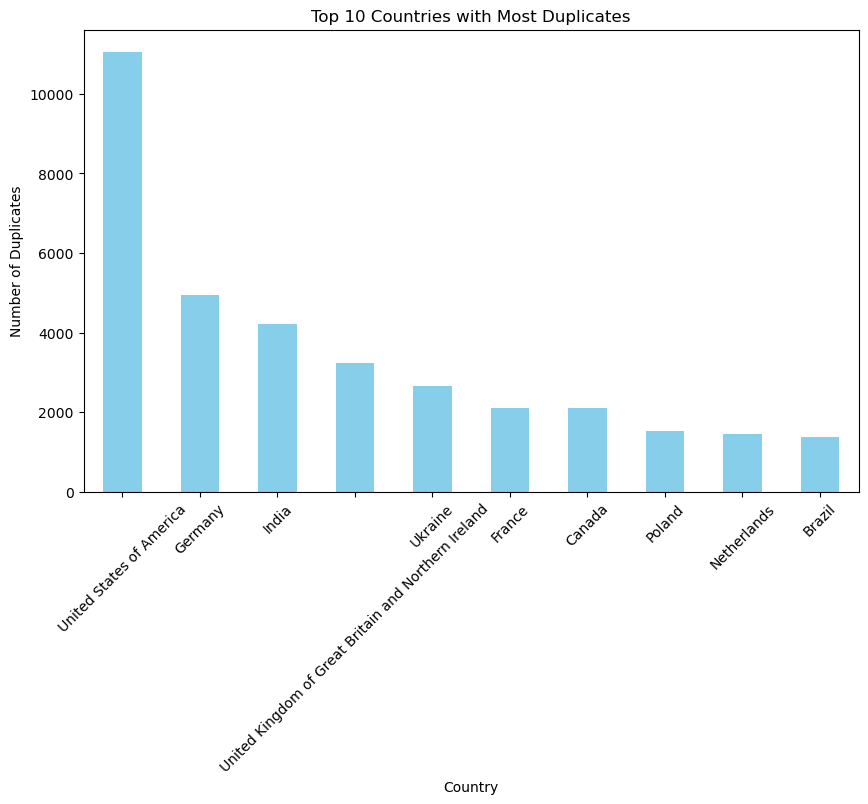

In [40]:
# Bar chart by country
plt.figure(figsize=(10, 6)) 
duplicate_counts_country_10.plot(kind='bar', color='skyblue') 
plt.title("Top 10 Countries with Most Duplicates") 
plt.xlabel("Country") 
plt.ylabel("Number of Duplicates") 
plt.xticks(rotation=45) 
plt.show()

In [64]:
# Count duplicates by Employment category
duplicate_counts_employment = duplicates_on_cols['Employment'].value_counts()
duplicate_counts_employment.head()

Employment
Employed, full-time                                                         39048
Independent contractor, freelancer, or self-employed                         4845
Student, full-time                                                           4713
Employed, full-time;Independent contractor, freelancer, or self-employed     3558
Not employed, but looking for work                                           2341
Name: count, dtype: int64

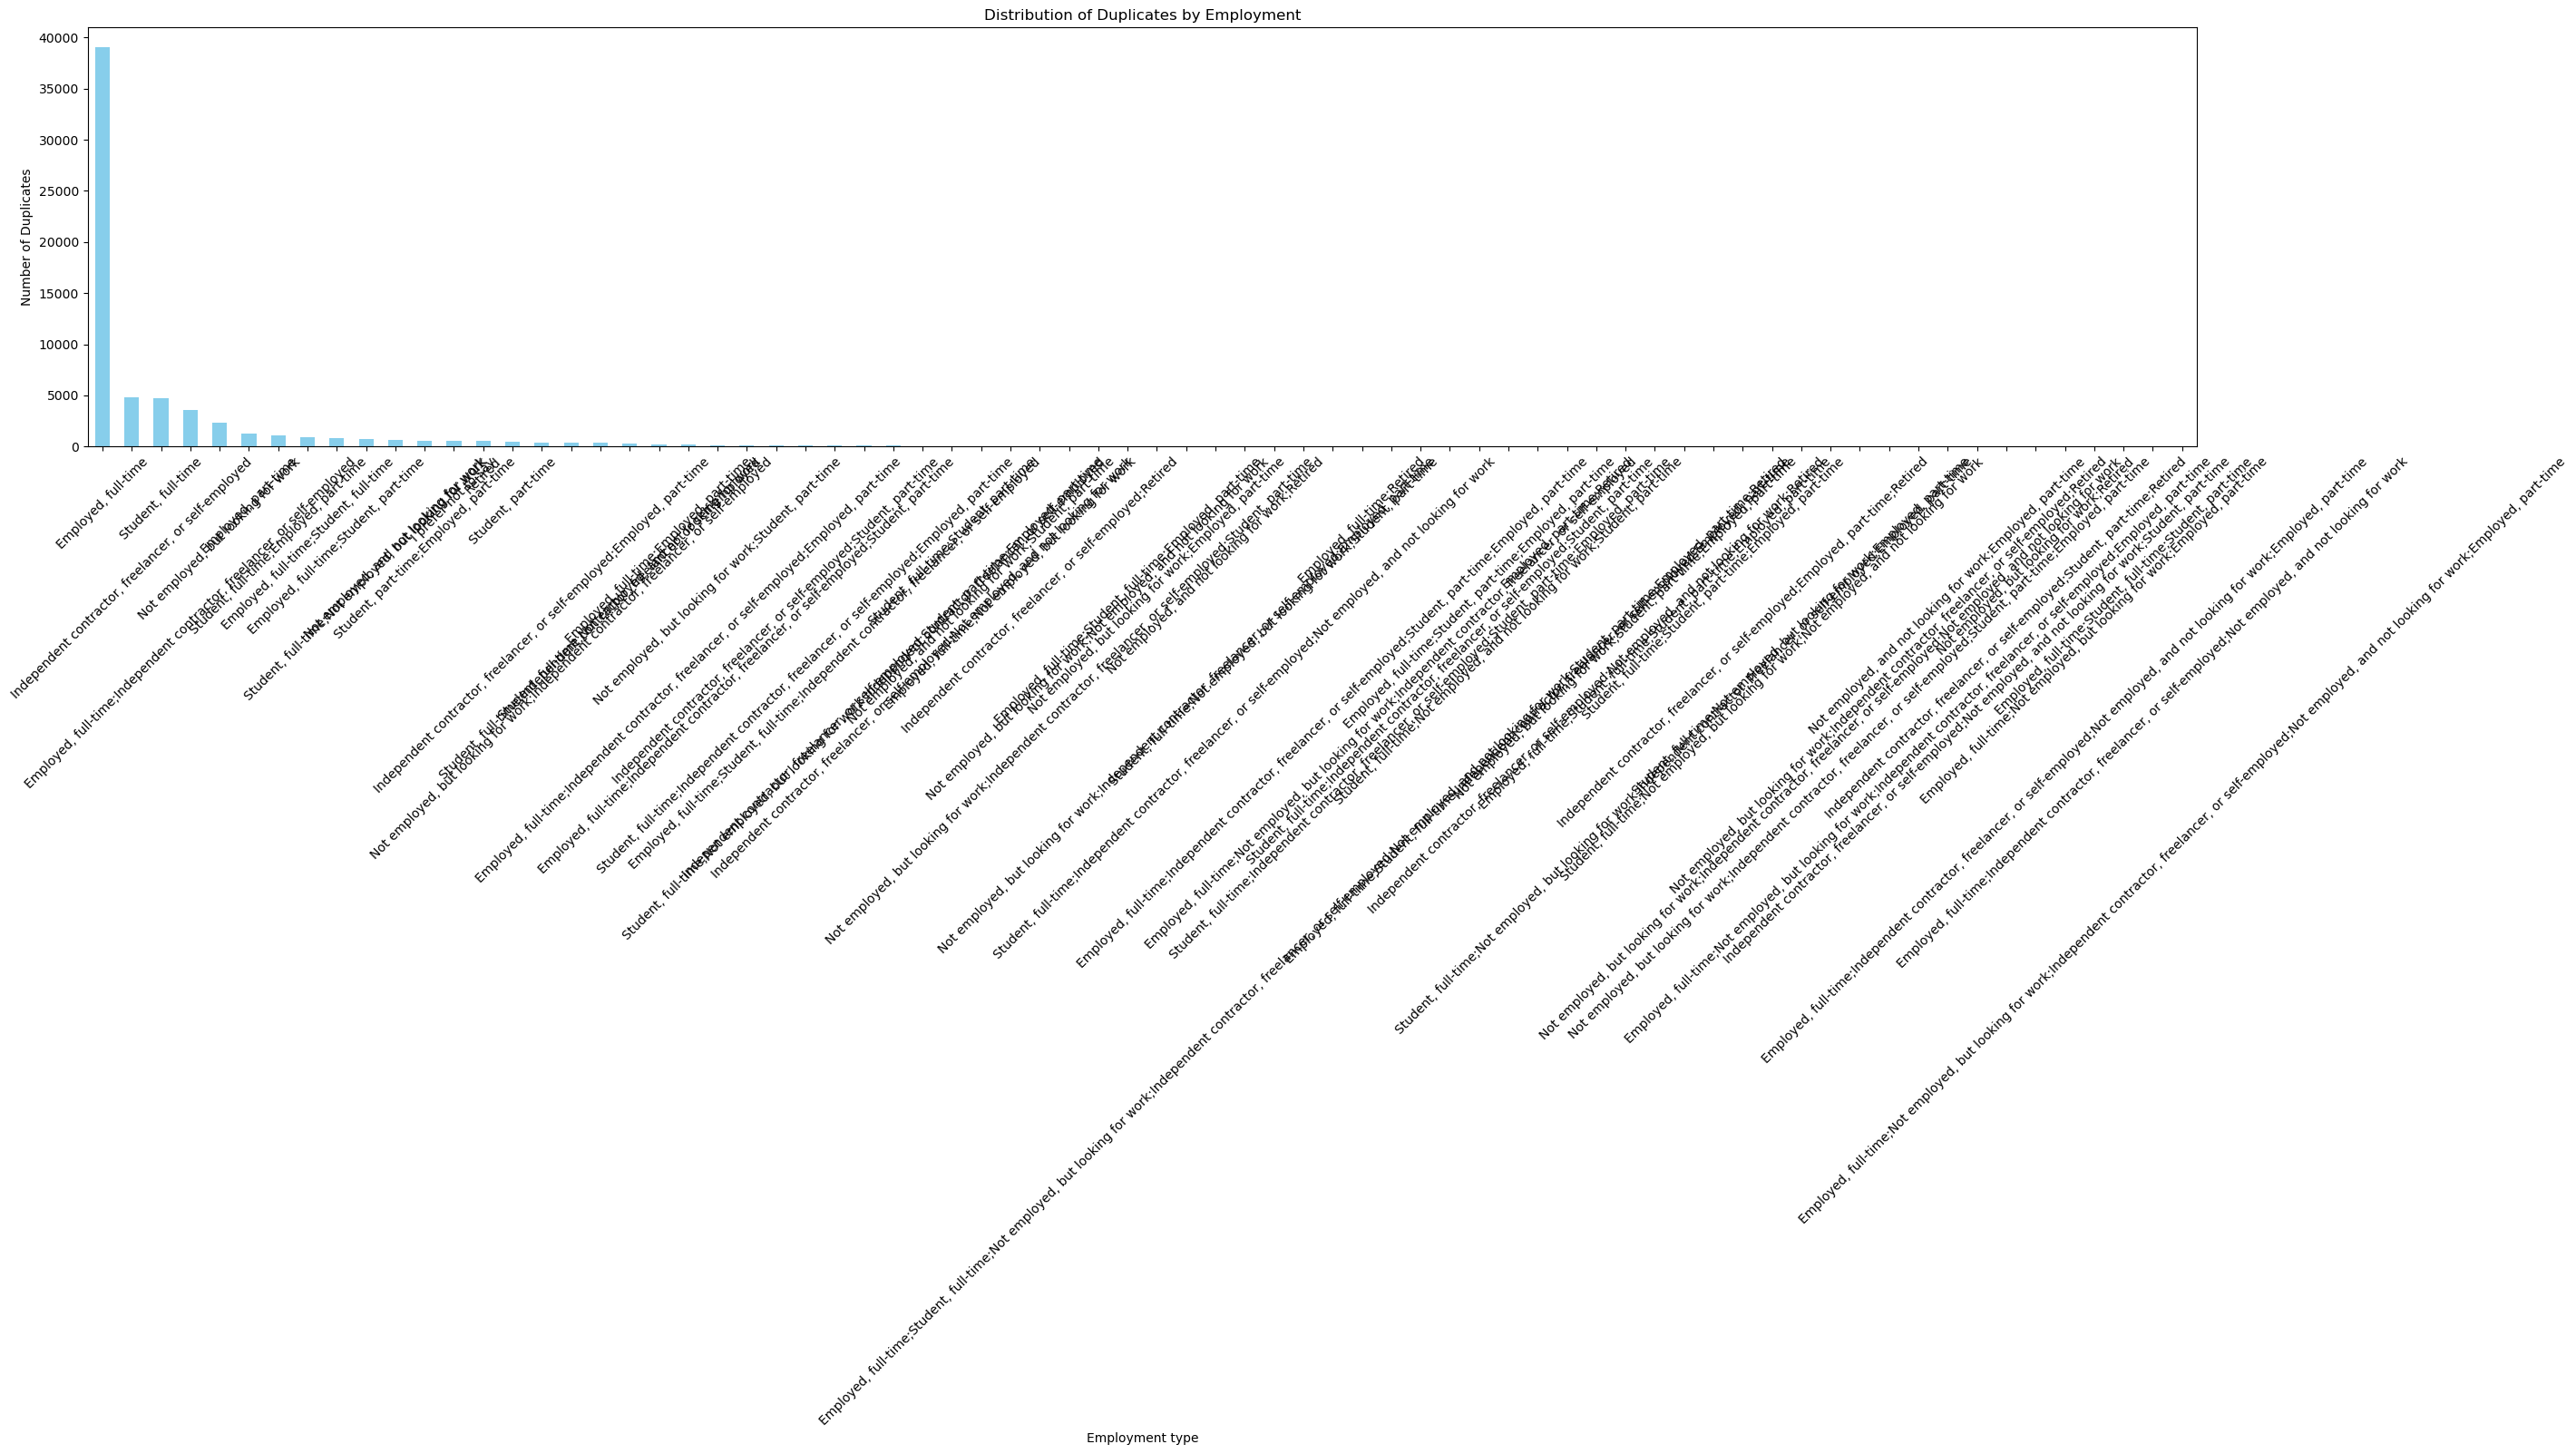

In [60]:
# Bar chart by employment category
plt.figure(figsize=(30, 6)) 
duplicate_counts_employment.plot(kind='bar', color='skyblue') 
plt.title("Distribution of Duplicates by Employment") 
plt.xlabel("Employment type") 
plt.ylabel("Number of Duplicates") 
plt.xticks(rotation=45) 
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [68]:
# Step 0: Define which columns to group by
group_cols = ['Age', 'Employment', 'EdLevel','ConvertedCompYearly']

# Step 1: Drop duplicates from original DF  to only rows that have duplicates on those columns

drop_duplicates_subset = df.drop_duplicates(subset=group_cols, keep=False)
drop_duplicates_subset.head() 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
376,377,I am learning to code,35-44 years old,"Student, part-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,30.0,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0
395,396,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
